<a href="https://colab.research.google.com/github/samudyata12/Mini-Project/blob/main/Covid_19_Analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("Covid_19_data.csv", parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [14]:
max_date=df['Date'].max()

In [15]:

top=df[df['Date']==max_date]   
top.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [16]:
world=top.groupby('Country/Region')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
world.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667


In [17]:
figure=px.choropleth(world,locations='Country/Region',  
                    locationmode='country names', 
                    color='Active', 
                    hover_name='Country/Region', 
                    range_color=[1,1000],   
                    projection='natural earth',  
                    color_continuous_scale=px.colors.sequential.Sunset,   
                    title='Countries With Active Cases')
figure.update_layout(title=dict(font=dict(size=28),x=0.5,xanchor='center'), 
                    margin=dict(l=60,r=60,t=50,b=10))  
figure.show()


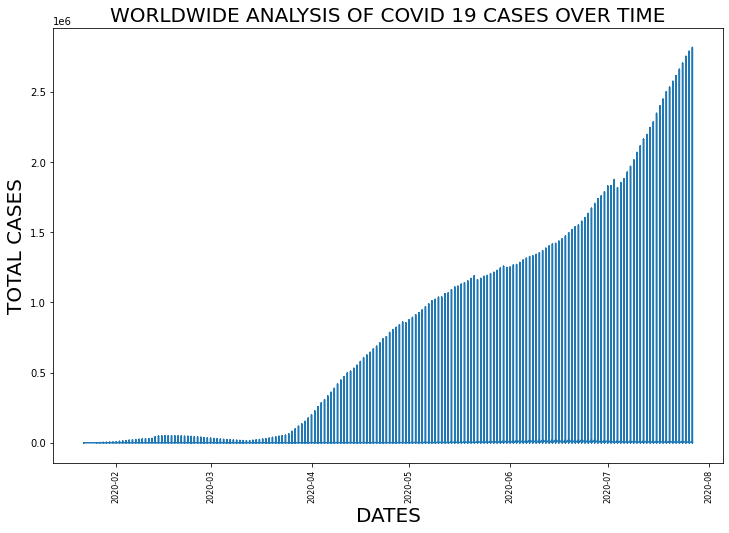

In [18]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel("DATES", fontsize=20)
plt.ylabel("TOTAL CASES", fontsize=20)
plt.title("WORLDWIDE ANALYSIS OF COVID 19 CASES OVER TIME",fontsize=20)
plt.plot(df['Date'],df['Active'])
plt.savefig("WorldwideAnalysisOverTime.png")
plt.show()


In [19]:
india=df[df['Country/Region']=='India']
india

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [20]:
fig=px.bar(india,x="Date",y="Active", color='Active',height=600,
           title="INDIA's COVID 19 CASES ANALYSIS OVER TIME",
           color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(title=dict(font=dict(size=28),x=0.5,xanchor='center'))
fig.show()

In [21]:
top_active_20=top.groupby('Country/Region')['Active'].sum().sort_values(ascending= False).reset_index().head(20)
top_active_20

,Country/Region,Active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


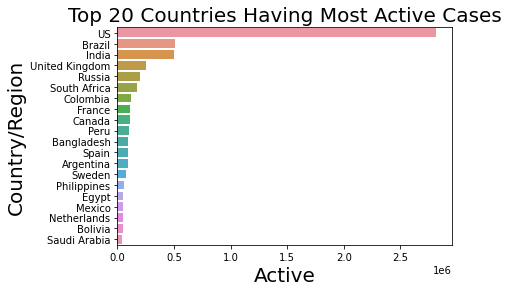

In [22]:
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Total Cases", fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.title("Top 20 Countries Having Most Active Cases",fontsize=20)

ax=sns.barplot(x=top_active_20['Active'],y=top_active_20['Country/Region'])
plt.savefig("top20ACTIVE.png")

In [23]:
top_deaths_20=top.groupby('Country/Region')['Deaths'].sum().sort_values(ascending= False).reset_index().head(20)
top_deaths_20

,Country/Region,Deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


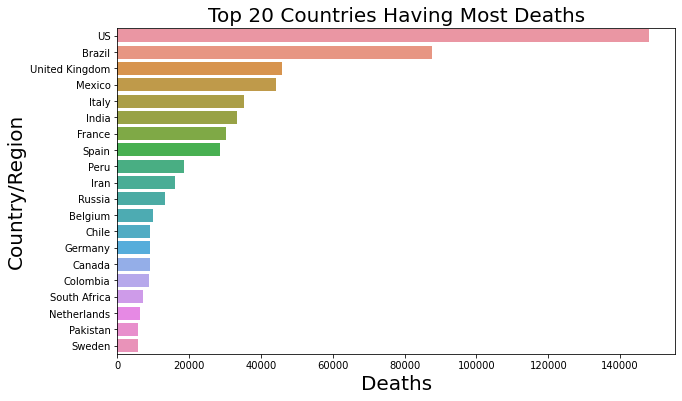

In [24]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Total Cases", fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.title("Top 20 Countries Having Most Deaths",fontsize=20)

bx=sns.barplot(x=top_deaths_20['Deaths'],y=top_deaths_20['Country/Region'])
plt.savefig("top20DEATHS.png")


In [25]:
top_Recovered_20=top.groupby('Country/Region')['Recovered'].sum().sort_values(ascending= False).reset_index().head(20)
top_Recovered_20

,Country/Region,Recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


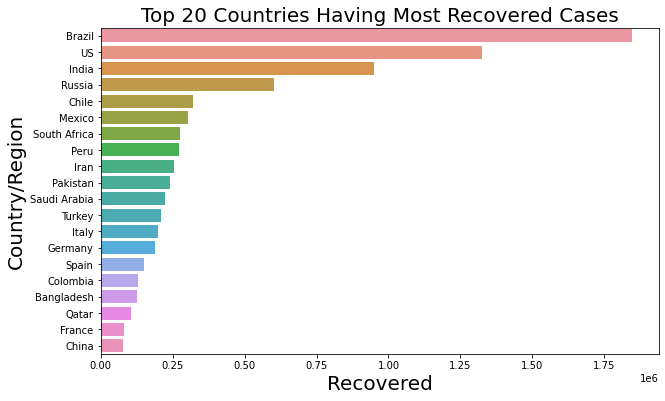

In [26]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Total Cases", fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.title("Top 20 Countries Having Most Recovered Cases",fontsize=20)

bx=sns.barplot(x=top_Recovered_20['Recovered'],y=top_Recovered_20['Country/Region'])
plt.savefig("top20RECOVERED.png")

In [27]:
china=df[df['Country/Region']=='China']
china=china.groupby('Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index().tail(90)

In [28]:
us=df[df['Country/Region']=='US']
us=us.groupby('Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index().tail(90)


In [29]:
ind=df[df['Country/Region']=='India']
ind=ind.groupby('Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index().tail(90)

In [31]:
italy=df[df['Country/Region']=='Italy']
italy=italy.groupby('Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index().tail(90)

In [32]:
y=range(1,91)

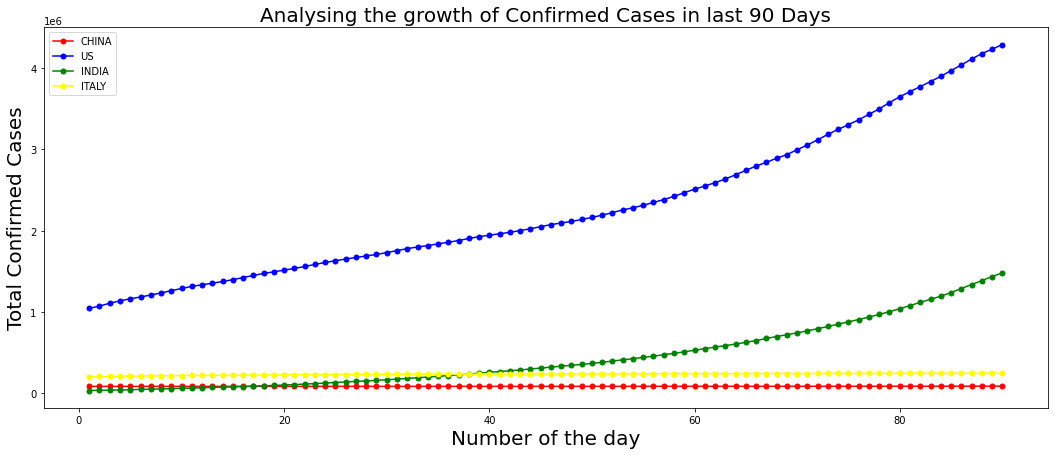

In [33]:
plt.figure(figsize=(18,7))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of the day", fontsize=20)
plt.ylabel("Total Confirmed Cases", fontsize=20)
plt.title("Analysing the growth of Confirmed Cases in last 90 Days",fontsize=20)
plt.plot(y,china['Confirmed'], color='red',marker='.',markersize=10, label='CHINA')

plt.plot(y,us['Confirmed'], color='blue',marker='.',markersize=10,label='US')

plt.plot(y,ind['Confirmed'], color='green',marker='.',markersize=10,label='INDIA')

plt.plot(y,italy['Confirmed'], color='yellow',marker='.',markersize=10,label='ITALY')
plt.legend()
plt.savefig("ConfirmedCasesLast90Days.png")
plt.show()


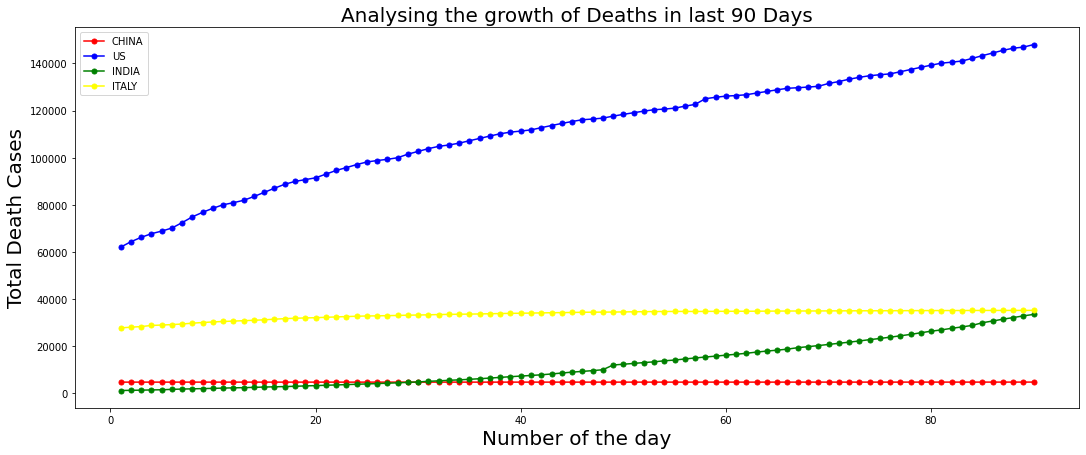

In [34]:
plt.figure(figsize=(18,7))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of the day", fontsize=20)
plt.ylabel("Total Death Cases", fontsize=20)
plt.title("Analysing the growth of Deaths in last 90 Days",fontsize=20)
plt.plot(y,china['Deaths'], color='red',marker='.',markersize=10, label='CHINA')

plt.plot(y,us['Deaths'], color='blue',marker='.',markersize=10,label='US')

plt.plot(y,ind['Deaths'], color='green',marker='.',markersize=10,label='INDIA')

plt.plot(y,italy['Deaths'], color='yellow',marker='.',markersize=10,label='ITALY')
plt.legend()
plt.savefig("DeathCasesLast90Days.png")
plt.show()

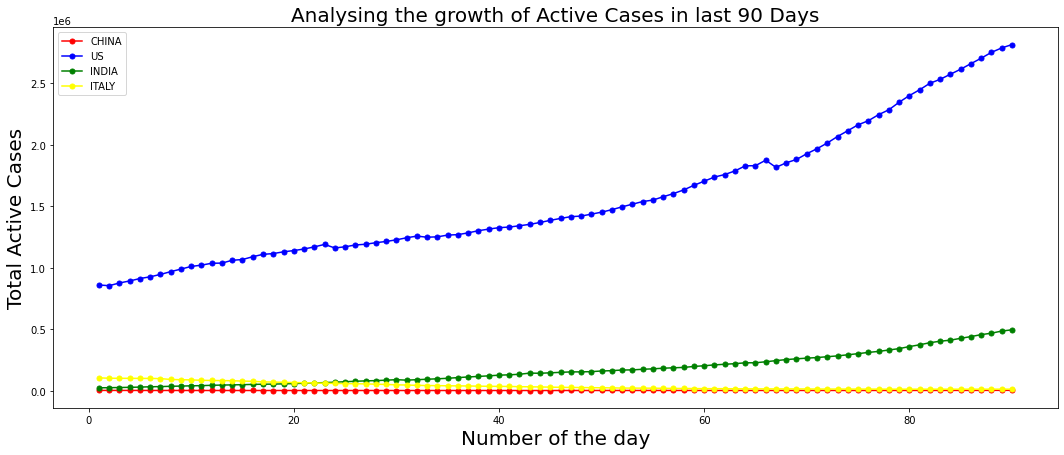

In [35]:
plt.figure(figsize=(18,7))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of the day", fontsize=20)
plt.ylabel("Total Active Cases", fontsize=20)
plt.title("Analysing the growth of Active Cases in last 90 Days",fontsize=20)
plt.plot(y,china['Active'], color='red',marker='.',markersize=10, label='CHINA')

plt.plot(y,us['Active'], color='blue',marker='.',markersize=10,label='US')

plt.plot(y,ind['Active'], color='green',marker='.',markersize=10,label='INDIA')

plt.plot(y,italy['Active'], color='yellow',marker='.',markersize=10,label='ITALY')
plt.legend()
plt.savefig("ActiveCasesLast90Days.png")
plt.show()

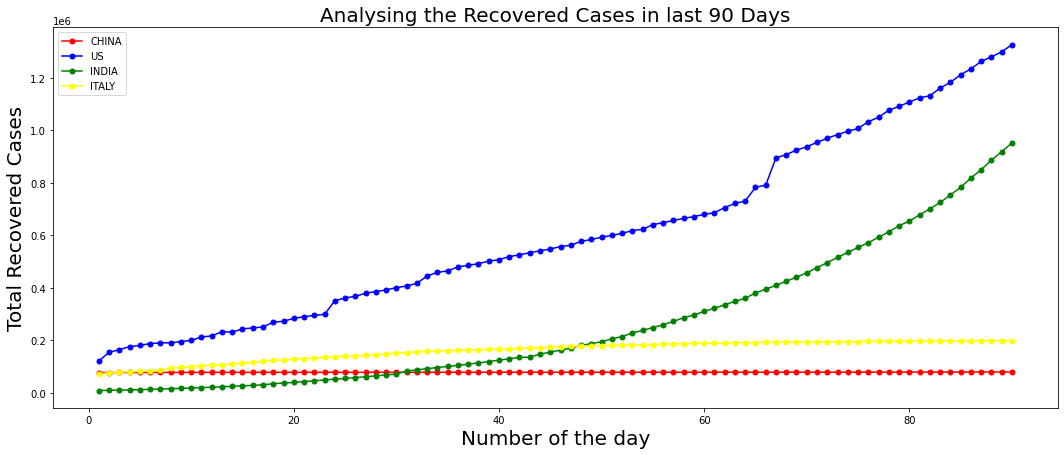

In [36]:
plt.figure(figsize=(18,7))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of the day", fontsize=20)
plt.ylabel("Total Recovered Cases", fontsize=20)
plt.title("Analysing the Recovered Cases in last 90 Days",fontsize=20)
plt.plot(y,china['Recovered'], color='red',marker='.',markersize=10, label='CHINA')

plt.plot(y,us['Recovered'], color='blue',marker='.',markersize=10,label='US')

plt.plot(y,ind['Recovered'], color='green',marker='.',markersize=10,label='INDIA')

plt.plot(y,italy['Recovered'], color='yellow',marker='.',markersize=10,label='ITALY')
plt.legend()
plt.savefig("RecoveredCasesLast90Days.png")
plt.show()

In [37]:
from fbprophet import Prophet

In [38]:
confirmed= df.groupby('Date').sum()['Confirmed'].reset_index()

In [39]:
confirmed.columns=['ds','y']

In [40]:
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [41]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future= m.make_future_dataframe(periods=30)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [42]:
forcast=m.predict(future)

In [43]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
213,2020-08-22,2.144165e+07,2.073746e+07,2.209791e+07,2.071171e+07,2.208985e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.089789e+07,2.233675e+07,2.087585e+07,2.232586e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.102583e+07,2.259467e+07,2.103672e+07,2.256197e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.121911e+07,2.281569e+07,2.120127e+07,2.280849e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07
217,2020-08-26,2.225810e+07,2.138350e+07,2.307479e+07,2.137179e+07,2.306370e+07,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,2.224712e+07


In [44]:
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632197e+07,1.616038e+07,1.648199e+07
189,2020-07-29,1.653194e+07,1.637002e+07,1.669182e+07
190,2020-07-30,1.674593e+07,1.659303e+07,1.690538e+07
191,2020-07-31,1.696120e+07,1.679416e+07,1.712078e+07
192,2020-08-01,1.716899e+07,1.700373e+07,1.734126e+07
193,2020-08-02,1.736665e+07,1.719752e+07,1.753293e+07
194,2020-08-03,1.756134e+07,1.738077e+07,1.774283e+07
195,2020-08-04,1.775076e+07,1.756016e+07,1.793244e+07
196,2020-08-05,1.796073e+07,1.774459e+07,1.813936e+07
197,2020-08-06,1.817473e+07,1.796071e+07,1.837807e+07


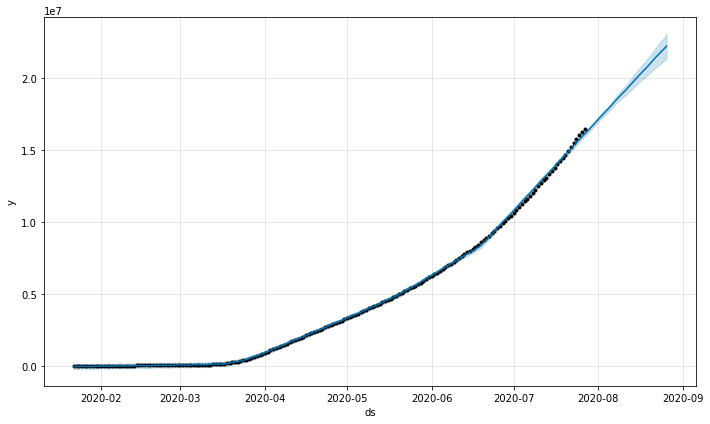

In [45]:
confirmed_plot=m.plot(forcast)

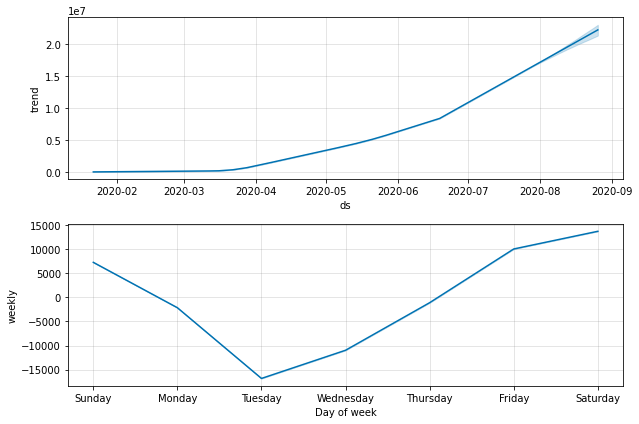

In [46]:
confirmed_components_plot=m.plot_components(forcast)


In [48]:
deaths= df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns=['ds','y']
d=Prophet(interval_width=0.95)
d.fit(deaths)
future_deaths= d.make_future_dataframe(periods=30)
forcast_deaths=d.predict(future_deaths)
forcast_deaths[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652315.258190,649341.077170,655120.301819
189,2020-07-29,657881.664836,654893.522745,660912.223911
190,2020-07-30,663491.089245,660144.182250,666730.853719
191,2020-07-31,669006.329954,665242.226314,672527.070895
192,2020-08-01,673888.117495,669693.863435,677761.720487
193,2020-08-02,678025.694519,673090.749388,682652.979824
194,2020-08-03,682315.120343,675947.175706,688331.254148
195,2020-08-04,687520.894722,679808.157643,694054.809614
196,2020-08-05,693087.301368,684208.731585,700061.983301
197,2020-08-06,698696.725777,688115.366774,707229.948053


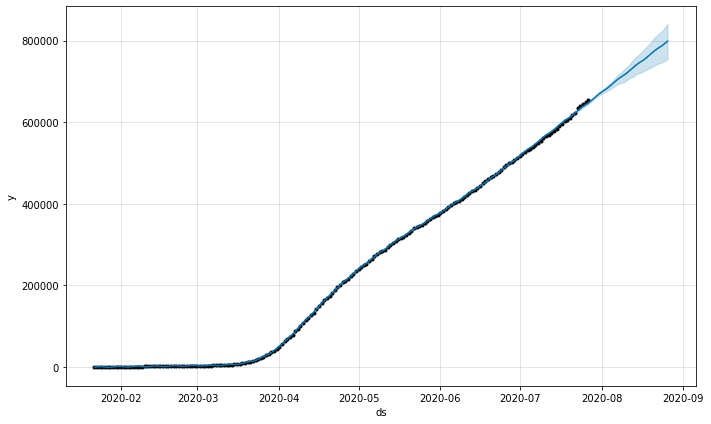

In [49]:
deaths_plot=d.plot(forcast_deaths)

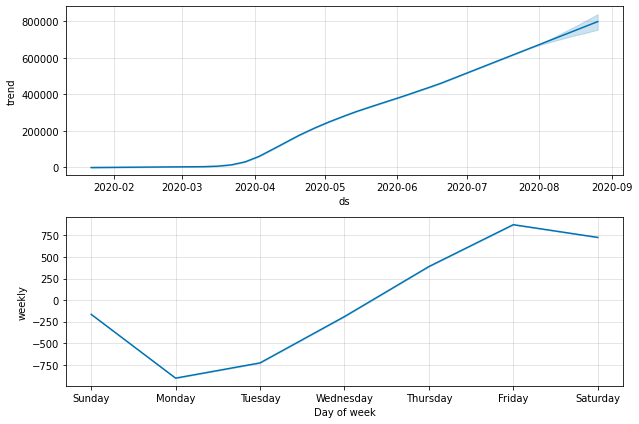

In [50]:
deaths_components_plot=d.plot_components(forcast_deaths)

In [51]:
Recovered= df.groupby('Date').sum()['Recovered'].reset_index()
Recovered.columns=['ds','y']
r=Prophet(interval_width=0.95)
r.fit(Recovered)
future_Recovered= r.make_future_dataframe(periods=30)
forcast_Recovered=r.predict(future_Recovered)
forcast_Recovered[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.313998e+06,9.197788e+06,9.438079e+06
189,2020-07-29,9.456200e+06,9.324998e+06,9.572958e+06
190,2020-07-30,9.599008e+06,9.483010e+06,9.726731e+06
191,2020-07-31,9.740559e+06,9.622544e+06,9.864636e+06
192,2020-08-01,9.880868e+06,9.760809e+06,1.000400e+07
193,2020-08-02,1.000698e+07,9.883039e+06,1.014016e+07
194,2020-08-03,1.014361e+07,1.001572e+07,1.028865e+07
195,2020-08-04,1.027110e+07,1.013681e+07,1.042065e+07
196,2020-08-05,1.041330e+07,1.026879e+07,1.056514e+07
197,2020-08-06,1.055611e+07,1.039288e+07,1.072753e+07


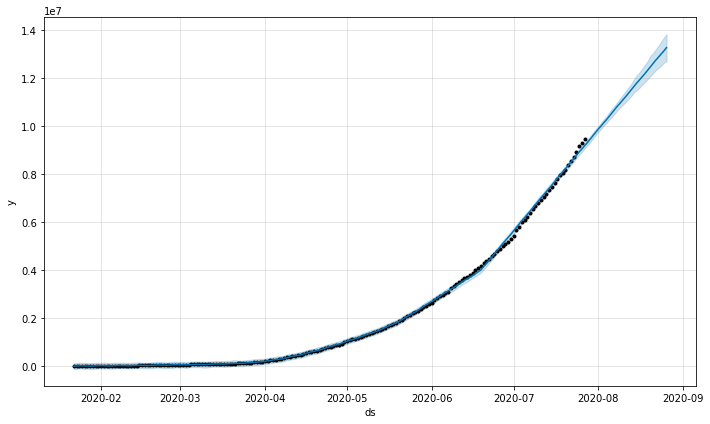

In [52]:
Recovered_plot=r.plot(forcast_Recovered)

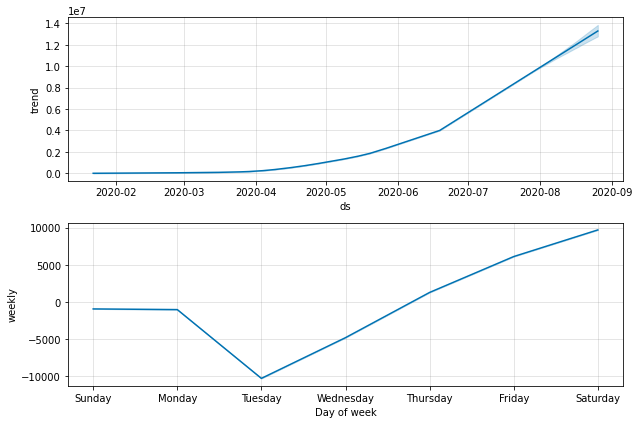

In [53]:
Recovered_components_plot=r.plot_components(forcast_Recovered)